In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Data Understanding

In [3]:
df = pd.read_csv('reddit_opinion_republican.csv', skipinitialspace=True)
pd.set_option('display.max_columns', None)

In [4]:
df.dtypes

comment_id                     object
score                           int64
self_text                      object
subreddit                      object
created_time                   object
post_id                        object
author_name                    object
controversiality                int64
ups                             int64
downs                           int64
user_is_verified                 bool
user_account_created_time      object
user_awardee_karma            float64
user_awarder_karma            float64
user_link_karma               float64
user_comment_karma            float64
user_total_karma              float64
post_score                      int64
post_self_text                 object
post_title                     object
post_upvote_ratio             float64
post_thumbs_ups                 int64
post_total_awards_received      int64
post_created_time              object
dtype: object

In [5]:
df.tail()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
1297851,dn4w23l,2,Good bot,ConservativeDemocrat,2017-09-17 18:54:07,70l48o,[deleted],0,2,0,False,NaN,0.0,0.0,0.0,0.0,0.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
1297852,dn4guol,3,The top level post has been removed.,ConservativeDemocrat,2017-09-17 13:42:04,70l48o,DuplicatesBot,0,3,0,True,2017-09-06 19:54:18,0.0,60.0,32.0,17615.0,17707.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
1297853,dn4ewd5,1,delete,ConservativeDemocrat,2017-09-17 12:43:05,70l48o,Autarch_Severian,0,1,0,True,2015-04-25 15:19:54,0.0,0.0,4035.0,9094.0,13129.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
1297854,dn4dwix,2,*Third Way had an article*\n\n*on all the time...,ConservativeDemocrat,2017-09-17 12:11:31,70l48o,I_am_a_haiku_bot,0,2,0,False,NaN,0.0,0.0,0.0,0.0,0.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
1297855,dn4dvry,8,Third Way had an article on all the times we w...,ConservativeDemocrat,2017-09-17 12:10:57,70l48o,cyberklown28,0,8,0,True,2013-05-18 01:50:32,382.0,40.0,55209.0,126596.0,182227.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34


In [6]:
df.describe()

,score,controversiality,ups,downs,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_upvote_ratio,post_thumbs_ups,post_total_awards_received
count,1.297856e+06,1.297856e+06,1.297856e+06,1297856.0,1.297816e+06,1.297816e+06,1.297816e+06,1.297816e+06,1.297816e+06,1.297856e+06,1.297856e+06,1.297856e+06,1297856.0
mean,2.748480e+01,3.569271e-02,2.748480e+01,0.0,9.790259e+02,3.692049e+02,2.372803e+04,1.011699e+05,1.262462e+05,3.342725e+03,8.693886e-01,3.342725e+03,0.0
std,1.757821e+02,1.855230e-01,1.757821e+02,0.0,4.478108e+03,2.636001e+03,2.438995e+05,1.984150e+05,3.450627e+05,5.664923e+03,1.873848e-01,5.664923e+03,0.0
min,-7.850000e+02,0.000000e+00,-7.850000e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-9.900000e+01,0.000000e+00,3.000000e-02,0.000000e+00,0.0
25%,1.000000e+00,0.000000e+00,1.000000e+00,0.0,8.000000e+00,0.000000e+00,3.800000e+01,8.488000e+03,9.894000e+03,1.710000e+02,8.700000e-01,1.710000e+02,0.0
50%,4.000000e+00,0.000000e+00,4.000000e+00,0.0,1.750000e+02,0.000000e+00,6.780000e+02,3.346500e+04,3.847000e+04,1.050000e+03,9.500000e-01,1.050000e+03,0.0
75%,1.400000e+01,0.000000e+00,1.400000e+01,0.0,7.000000e+02,8.400000e+01,5.141000e+03,1.060110e+05,1.212280e+05,4.099000e+03,9.700000e-01,4.099000e+03,0.0
max,1.964100e+04,1.000000e+00,1.964100e+04,0.0,6.341870e+05,6.556090e+05,1.475495e+07,4.030720e+06,1.573260e+07,6.765300e+04,1.000000e+00,6.765300e+04,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297856 entries, 0 to 1297855
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   comment_id                  1297856 non-null  object 
 1   score                       1297856 non-null  int64  
 2   self_text                   1297841 non-null  object 
 3   subreddit                   1297856 non-null  object 
 4   created_time                1297856 non-null  object 
 5   post_id                     1297856 non-null  object 
 6   author_name                 1297856 non-null  object 
 7   controversiality            1297856 non-null  int64  
 8   ups                         1297856 non-null  int64  
 9   downs                       1297856 non-null  int64  
 10  user_is_verified            1297856 non-null  bool   
 11  user_account_created_time   1275709 non-null  object 
 12  user_awardee_karma          1297816 non-null  float64
 1

In [8]:
# Transform the data type of 'col1' from object to string
df['self_text'] = df['self_text'].astype(str)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297856 entries, 0 to 1297855
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   comment_id                  1297856 non-null  object 
 1   score                       1297856 non-null  int64  
 2   self_text                   1297856 non-null  object 
 3   subreddit                   1297856 non-null  object 
 4   created_time                1297856 non-null  object 
 5   post_id                     1297856 non-null  object 
 6   author_name                 1297856 non-null  object 
 7   controversiality            1297856 non-null  int64  
 8   ups                         1297856 non-null  int64  
 9   downs                       1297856 non-null  int64  
 10  user_is_verified            1297856 non-null  bool   
 11  user_account_created_time   1275709 non-null  object 
 12  user_awardee_karma          1297816 non-null  float64
 1

In [10]:
df.shape

(1297856, 24)

In [11]:
df['created_time']

0          2024-03-13 19:38:13
1          2024-03-13 19:38:08
2          2024-03-13 19:37:47
3          2024-03-13 19:37:42
4          2024-03-13 19:37:37
                  ...         
1297851    2017-09-17 18:54:07
1297852    2017-09-17 13:42:04
1297853    2017-09-17 12:43:05
1297854    2017-09-17 12:11:31
1297855    2017-09-17 12:10:57
Name: created_time, Length: 1297856, dtype: object

In [12]:
# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['created_time'])

# Group by 'date' and calculate the count of rows per day
rows_per_day = df.groupby(df['datetime'].dt.date).size()

# Calculate the average rows per day
average_rows_per_day = rows_per_day.mean()

average_rows_per_day

1614.2487562189056

In [13]:
# Filtering duplicates
filtered_df = df.drop_duplicates(subset=['post_title'])

# Printing the filtered DataFrame
filtered_df.shape

(23447, 25)

In [14]:
# Convert 'datetime' column to datetime type
filtered_df['datetime'] = pd.to_datetime(filtered_df['created_time'])

# Group by 'date' and calculate the count of rows per day
rows_per_day = filtered_df.groupby(df['datetime'].dt.date).size()

# Calculate the average rows per day
average_rows_per_day = rows_per_day.mean()

average_rows_per_day

C:\Users\javie\AppData\Local\Temp\ipykernel_26988\1261424612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['datetime'] = pd.to_datetime(filtered_df['created_time'])


38.063311688311686

In [15]:
# Filtering duplicates
filtered_df = df.drop_duplicates(subset=['subreddit'])

# Printing the filtered DataFrame
filtered_df.shape

(30, 25)

In [16]:
count_delete = df[df['self_text'] == 'delete']
count_delete

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,datetime
657222,ki5ir5l,9,delete,conspiracy,2024-01-16 17:46:13,1988uhg,Ae119952,0,9,0,True,2022-07-31 03:29:49,0.0,0.0,1.0,20.0,21.0,0,If Russia wants to cause the most damage withi...,If Russia wants to cause the most damage withi...,0.27,0,0,2024-01-16 17:43:49,2024-01-16 17:46:13
1297853,dn4ewd5,1,delete,ConservativeDemocrat,2017-09-17 12:43:05,70l48o,Autarch_Severian,0,1,0,True,2015-04-25 15:19:54,0.0,0.0,4035.0,9094.0,13129.0,13,NaN,Trump and Schumer Wrong on Trade,1.00,13,0,2017-09-17 02:44:34,2017-09-17 12:43:05


In [17]:
count_delete = df[df['author_name'] == 'deleted']
count_delete

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,datetime


In [18]:
df = df[df['self_text'] != 'delete']
df.shape

(1297854, 25)

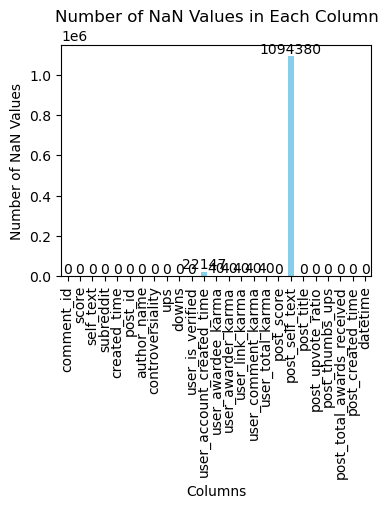

In [19]:
# Calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# Create a bar chart
nan_counts.plot(kind='bar', figsize=(4, 3), color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

for i, value in enumerate(nan_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

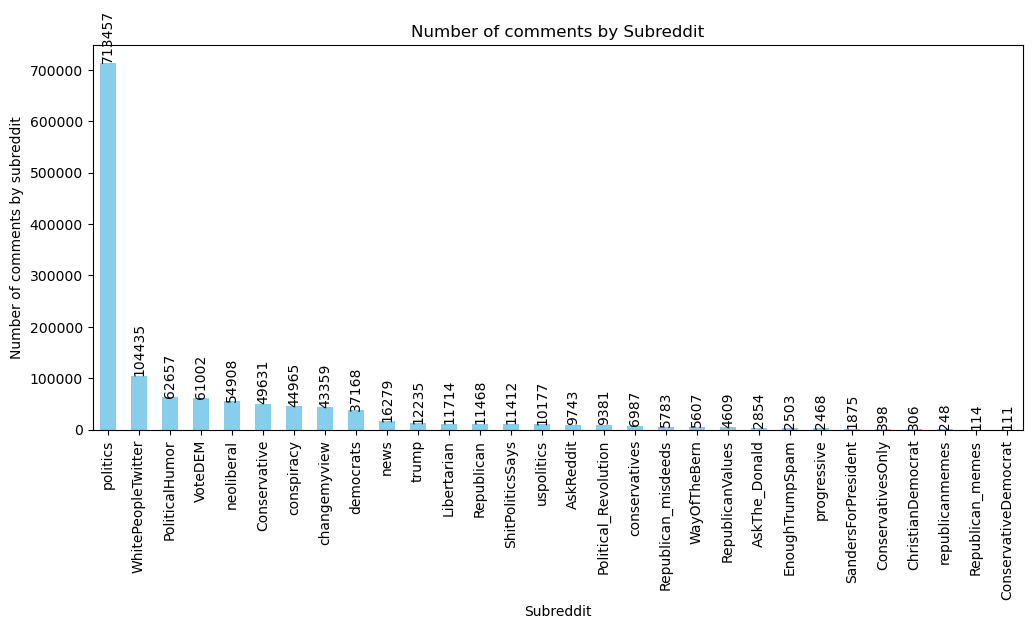

In [20]:
sub_counts = df['subreddit'].value_counts()

plt.figure(figsize=(12, 5))
sub_counts.plot(kind='bar', color='skyblue')
plt.title('Number of comments by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of comments by subreddit')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for i, value in enumerate(sub_counts):
    plt.text(i, value, str(value), ha='center', va='bottom', rotation=90)  # Adjust rotation here

plt.show()

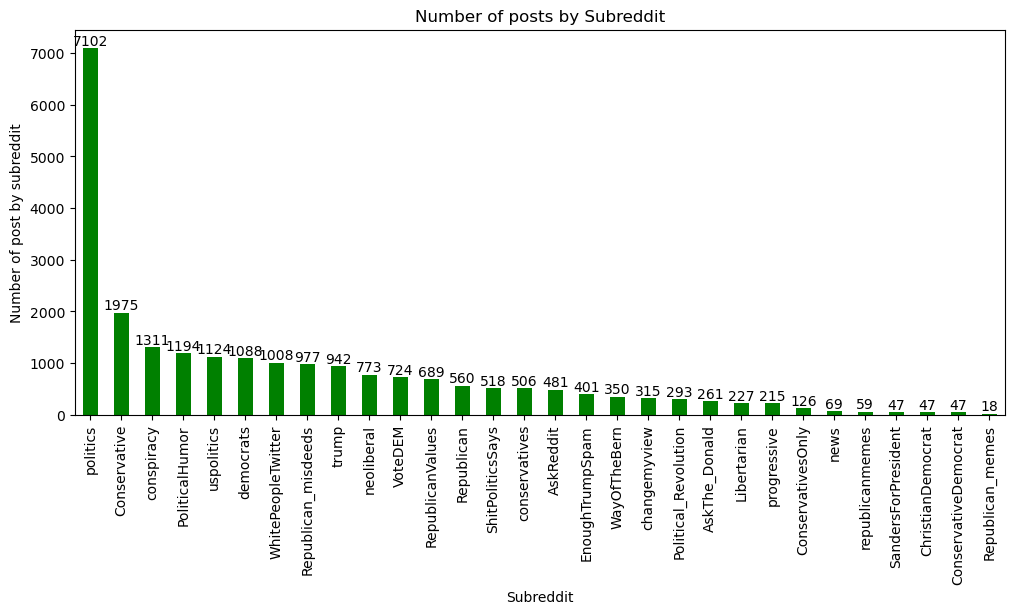

In [21]:
filtered_df = df.drop_duplicates(subset=['post_title'])
sub_counts = filtered_df['subreddit'].value_counts()

plt.figure(figsize=(12, 5))
sub_counts.plot(kind='bar', color='green')
plt.title('Number of posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of post by subreddit')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for i, value in enumerate(sub_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [25]:
filtered_df['date'] = pd.to_datetime(filtered_df['created_time'])

# Create an empty dictionary to store the results
posts_per_day = {}

# Iterate through the DataFrame
for index, row in filtered_df.iterrows():
    date = row['date'].date()  # Extracting the date part
    if date not in posts_per_day:
        posts_per_day[date] = 1
    else:
        posts_per_day[date] += 1

# Printing the dictionary
posts_per_day

C:\Users\javie\AppData\Local\Temp\ipykernel_26988\3374265507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['created_time'])


{datetime.date(2024, 3, 13): 355,
 datetime.date(2024, 3, 12): 241,
 datetime.date(2024, 3, 11): 171,
 datetime.date(2024, 3, 10): 173,
 datetime.date(2024, 3, 9): 194,
 datetime.date(2024, 3, 8): 247,
 datetime.date(2024, 3, 7): 233,
 datetime.date(2024, 3, 6): 247,
 datetime.date(2024, 3, 5): 209,
 datetime.date(2024, 3, 4): 194,
 datetime.date(2024, 3, 3): 171,
 datetime.date(2024, 3, 2): 130,
 datetime.date(2024, 3, 1): 192,
 datetime.date(2024, 2, 29): 214,
 datetime.date(2024, 2, 28): 202,
 datetime.date(2024, 2, 27): 169,
 datetime.date(2024, 2, 26): 190,
 datetime.date(2024, 2, 25): 173,
 datetime.date(2024, 2, 24): 189,
 datetime.date(2024, 2, 23): 204,
 datetime.date(2024, 2, 22): 220,
 datetime.date(2024, 2, 21): 203,
 datetime.date(2024, 2, 20): 184,
 datetime.date(2024, 2, 19): 158,
 datetime.date(2024, 2, 18): 186,
 datetime.date(2024, 2, 17): 189,
 datetime.date(2024, 2, 16): 179,
 datetime.date(2024, 2, 15): 216,
 datetime.date(2024, 2, 14): 204,
 datetime.date(2024, 2,

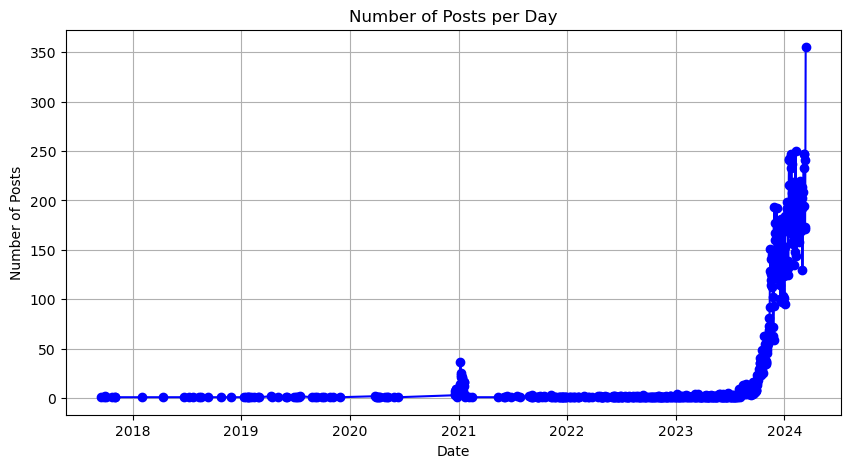

In [26]:
posts_series = pd.Series(posts_per_day)

# Plotting
plt.figure(figsize=(10, 5))
posts_series.plot(marker='o', color='blue', linestyle='-')
plt.title('Number of Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

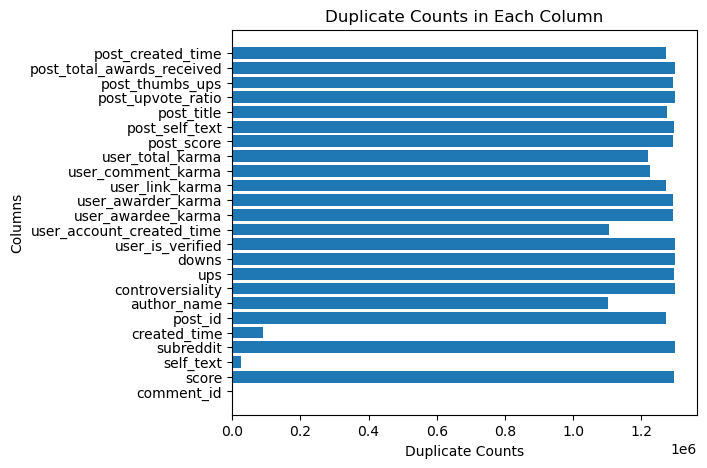

In [15]:
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Plotting
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Plotting
plt.figure(figsize=(6, 5))
plt.barh(duplicate_counts.index, duplicate_counts.values)
plt.ylabel('Columns')
plt.xlabel('Duplicate Counts')
plt.title('Duplicate Counts in Each Column')
plt.show()

In [16]:
df['date'] = pd.to_datetime(df['created_time'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

df.shape

(1297854, 26)

In [17]:
# Extract month from the 'date' column
df['month'] = df['date'].dt.month

df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,date,year,month
0,kuq34q8,1,"If I could make social media disappear, Tik To...",trump,2024-03-13 19:38:13,1bdznel,weenie_in_betweenie,0,1,0,True,2023-11-03 21:47:15,0.0,0.0,60.0,4434.0,4494.0,5,TRUMP2024🇺🇸,The only thing I don’t agree with Trump on.🤷🏼,0.86,5,0,2024-03-13 19:00:14,2024-03-13 19:38:13,2024,3
1,kuq346z,1,Idiots comforting idiots,politics,2024-03-13 19:38:08,1be0izi,Carcharis,0,1,0,True,2024-01-22 18:04:00,0.0,0.0,1237.0,16853.0,18090.0,4,NaN,Britt says Mike Johnson told her ‘it will be f...,1.00,4,0,2024-03-13 19:35:20,2024-03-13 19:38:08,2024,3
2,kuq31wv,1,"Her speech was anything but ""fine"".",politics,2024-03-13 19:37:47,1be0izi,VonBrandtner,0,1,0,True,2011-02-11 17:52:13,90.0,0.0,915.0,5796.0,6801.0,4,NaN,Britt says Mike Johnson told her ‘it will be f...,1.00,4,0,2024-03-13 19:35:20,2024-03-13 19:37:47,2024,3
3,kuq31bh,1,Why is it propaganda for someone to say they'r...,politics,2024-03-13 19:37:42,1bdu1lt,redcavzards,0,1,0,True,2015-08-29 20:49:13,172.0,0.0,213.0,4605.0,4990.0,3397,NaN,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,3397,0,2024-03-13 15:18:39,2024-03-13 19:37:42,2024,3
4,kuq30uw,1,Why is this news? The house leader reassured a...,politics,2024-03-13 19:37:37,1be0izi,LocalInteresting8556,0,1,0,True,2024-02-23 14:23:39,0.0,0.0,1.0,2132.0,2133.0,4,NaN,Britt says Mike Johnson told her ‘it will be f...,1.00,4,0,2024-03-13 19:35:20,2024-03-13 19:37:37,2024,3


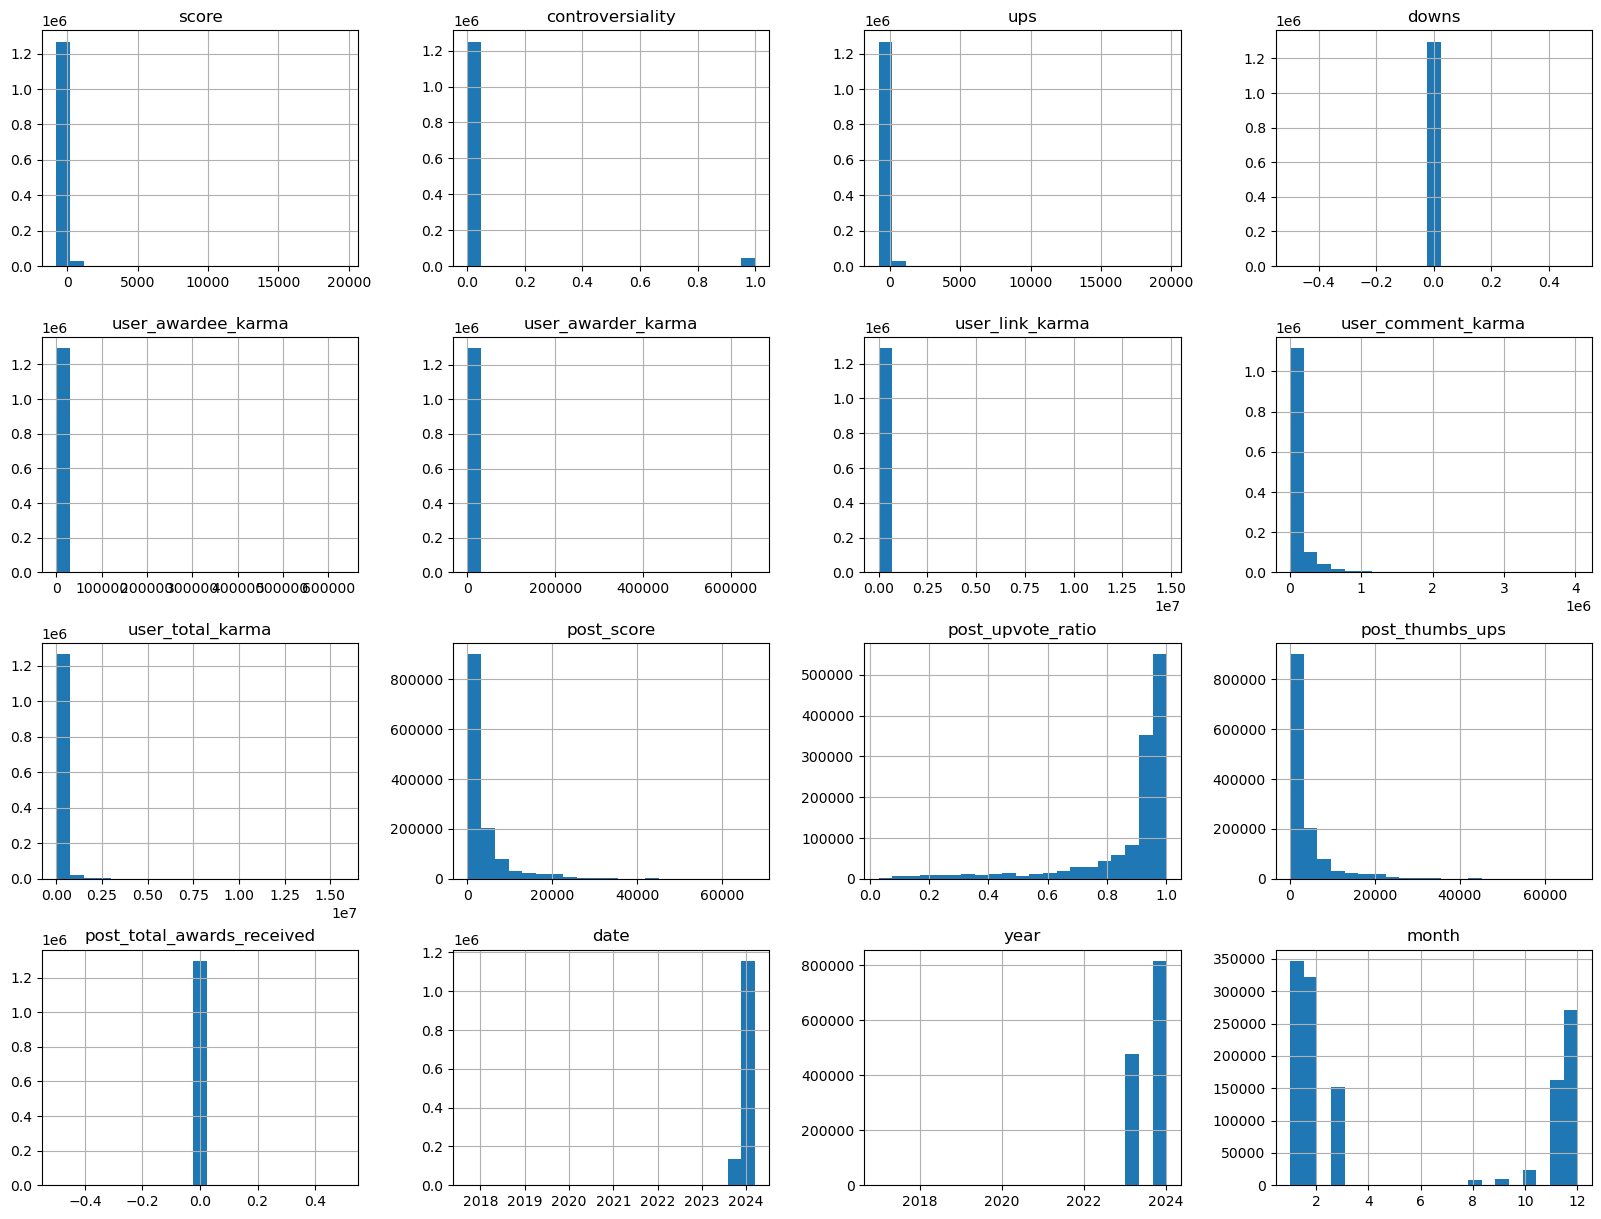

In [18]:
import math

df.hist(figsize=(20,15), bins=round(math.log2(len(df))+1)) # Sturges' rule
plt.show()


In [19]:
sub_counts

subreddit
politics                713457
WhitePeopleTwitter      104435
PoliticalHumor           62657
VoteDEM                  61002
neoliberal               54908
Conservative             49631
conspiracy               44965
changemyview             43359
democrats                37168
news                     16279
trump                    12235
Libertarian              11714
Republican               11468
ShitPoliticsSays         11412
uspolitics               10177
AskReddit                 9743
Political_Revolution      9381
conservatives             6987
Republican_misdeeds       5783
WayOfTheBern              5607
RepublicanValues          4609
AskThe_Donald             2854
EnoughTrumpSpam           2503
progressive               2468
SandersForPresident       1875
ConservativesOnly          398
ChristianDemocrat          306
republicanmemes            248
Republican_memes           114
ConservativeDemocrat       111
Name: count, dtype: int64

### Data preparation

#### Dimensionality reduction

In [20]:
# dimensionality reduction

columns_to_drop = ['post_self_text','comment_id','author_name','post_id','downs','user_account_created_time','user_is_verified','user_awardee_karma','user_awarder_karma','user_link_karma','user_total_karma','post_total_awards_received','user_comment_karma','post_thumbs_ups','post_created_time','controversiality','created_time']

df = df.drop(columns = columns_to_drop)

df.head()

,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month
0,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3
1,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3
2,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3
3,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3
4,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3


In [21]:
df.shape

(1297854, 10)

In [22]:
df_2023 = df[df['year'] == 2023]
df_2023.shape

(476249, 10)

In [23]:
df_2023 = df[df['year'] == 2023]
df_2023.shape

(476249, 10)

In [24]:
df_2021 = df[df['year'] == 2021]
df_2021.shape

(2055, 10)

In [25]:
df_2020 = df[df['year'] == 2020]
df_2020.shape

(742, 10)

In [26]:
df = df[df['year'] > 2022]

#### Dropping NaN values in self_text

In [27]:
df = df.dropna(subset=['self_text'])

In [28]:
df.shape

(1293150, 10)

#### Remapping titles into numerical labels

In [29]:
# Create a mapping dictionary to map class labels to numbers
label_mapping = {label: idx for idx, label in enumerate(df['post_title'].unique())}

# Create a new column 'numerical_label' with the numerical representation of class labels
df['numerical_label'] = df['post_title'].map(label_mapping)

df.tail()

,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
1293146,12,I honestly believe everyone instinctual knows ...,SandersForPresident,12,1089,"On Tax Avoidance, Says Bernie Sanders, 'Trump ...",1.0,2023-01-01 12:38:20,2023,1,22803
1293147,1,Not getting enough attention at home?,republicanmemes,1,0,"This is statistically true, 80% of congression...",0.4,2023-01-01 05:24:40,2023,1,22804
1293148,41,"Well, there's another no-brainer",SandersForPresident,41,1089,"On Tax Avoidance, Says Bernie Sanders, 'Trump ...",1.0,2023-01-01 02:07:17,2023,1,22803
1293149,2,Do we have a list of all people of all politic...,progressive,2,219,Yet Another Republican Commits Voter Fraud - J...,1.0,2023-01-01 01:05:18,2023,1,22800
1293150,3,you know that list is gonna be a whole bunch o...,progressive,3,219,Yet Another Republican Commits Voter Fraud - J...,1.0,2023-01-01 00:57:14,2023,1,22800


#### post_title counts 

In [30]:
df['numerical_label'].value_counts()

### classes are definitely imbalanced


numerical_label
5443     2662
12816     767
12367     572
15084     554
9844      545
         ... 
11356       1
11334       1
11331       1
20986       1
22804       1
Name: count, Length: 22805, dtype: int64

### Sentiment Analysis Reddit Comment Sentiment Final

In [31]:
#!pip install torch

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim


In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm

In [34]:
tokenizer = AutoTokenizer.from_pretrained("AG6019/reddit-comment-sentiment-final")
model = AutoModelForSequenceClassification.from_pretrained("AG6019/reddit-comment-sentiment-final")

c:\Users\javie\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [35]:
df = df[df['self_text'].apply(lambda text: len(tokenizer(text)['input_ids']) <= 512)]
df = df.reset_index(drop=True)



Token indices sequence length is longer than the specified maximum sequence length for this model (1513 > 512). Running this sequence through the model will result in indexing errors


In [36]:
df.shape

(1289899, 11)

In [37]:
def polarity_scores_AG6019(x):
    encoded_text = tokenizer(x, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'AG6019_neg' : scores[0],
        'AG6019_pos' : scores[1]
    }
    return scores_dict

In [38]:
AG6019_results = {}

for o, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['self_text']
        index_key = row.name
        AG6019_results[index_key] = polarity_scores_AG6019(text)
    except RuntimeError:
        print(f'Broke for row {index_key}')

  0%|          | 0/1289899 [00:00<?, ?it/s]

def polarity_scores_AG6019_chunked(text, max_chunk_length=512):
    chunks = chunk_text(text, max_chunk_length)
    scores_dict = {'AG6019_neg': 0.0, 'AG6019_pos': 0.0}

    for chunk in chunks:
        encoded_text = tokenizer(chunk, return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        # Aggregate scores from each chunk
        scores_dict['AG6019_neg'] += scores[0] / len(chunks)
        scores_dict['AG6019_pos'] += scores[1] / len(chunks)

    return scores_dict



results = {}

for index_key, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['self_text']
        results[index_key] = polarity_scores_AG6019_chunked(text)
    except RuntimeError:
        print(f'Broke for row {index_key}')

In [39]:
AG6019_results[206]

{'AG6019_neg': 0.0112467455, 'AG6019_pos': 0.9887532}

In [40]:
df.iloc[206]['self_text']

'They’re too busy doing blow in uncle Clarence’s new RV'

In [41]:
AG6019_results[290]

{'AG6019_neg': 0.4931788, 'AG6019_pos': 0.5068212}

In [42]:
df.iloc[290]['self_text']

'I’ve never seen him claim to be a Republican. Just because he wrote a book e McCain doesn’t make him a Republican'

In [43]:
AG6019_results[13128]

{'AG6019_neg': 0.00661891, 'AG6019_pos': 0.99338114}

In [44]:
df.iloc[13128]['self_text']

"The majority is so slim, it's quite possible that Democrats get the majority in the House ***before*** the election.\n\n## [***Worry less, do more!***](https://www.hopiumchronicles.com/)\n\nDo your part!\n\nRegister, *make sure make sure make sure* you're still registered (***[Republicans are purging voter rolls](https://www.nytimes.com/2024/03/03/us/politics/trump-voter-rolls.html)***), and make sure your friends and family are registered!\n\nhttps://www.vote.org/\n\nhttps://www.votesaveamerica.com/be-a-voter/\n\nIt's important for everyone to know what they are voting for!\n\nhttps://ballotpedia.org/Sample_Ballot_Lookup\n\nYour voice matters. If it didn't matter, you wouldn't have so many people trying to stop you from voting, or telling you that your vote doesn't matter.\n\n## ***BE A VOTER!***"

In [45]:
df.iloc[13083]['self_text']

'One less Buck in the Trump legal bailout camp'

In [46]:
df.iloc[13082]['self_text']

'Shouldnt you be secretly in a hospital somewhere boss?'

In [47]:
AG6019_results[13081]

{'AG6019_neg': 0.55136913, 'AG6019_pos': 0.44863093}

In [48]:
df.iloc[13081]['self_text']

'As if that works. It won’t. Let him talk'

### Progress notes 24.3.6  
- Must filter out the token sequences that exceed 512 before running the code.  
- Must then run the algorithms and check the results.  
- Must then compare the results between the bert model and vader.


### Sentiment Analysis TextBlob

TextBlob is a python library for Natural Language Processing (NLP).TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. TextBlob is a simple library which supports complex analysis and operations on textual data.

For lexicon-based approaches, a sentiment is defined by its semantic orientation and the intensity of each word in the sentence. This requires a pre-defined dictionary classifying negative and positive words. Generally, a text message will be represented by bag of words. After assigning individual scores to all the words, final sentiment is calculated by some pooling operation like taking an average of all the sentiments.

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).

For example: We calculated polarity and subjectivity for “I do not like this example at all, it is too boring”. For this particular example, polarity = -1 and subjectivity is 1, which is fair.

Source: https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

In [49]:
#!pip install textblob
from textblob import TextBlob
from nltk.corpus import stopwords

In [50]:
#L = df.iloc[1]['self_text']

In [51]:
#TextBlob_results[0] = TextBlob(L)

In [52]:
#TextBlob_results[0].sentiment
polarity_score = []
subjectivity_score = []

for i in tqdm(range(0,  df.shape[0]) ):
    score = TextBlob(df.iloc[i]['self_text'])
    polarity = score.sentiment[0]
    subjectivity = score.sentiment[1]
    polarity_score.append(polarity)
    subjectivity_score.append(subjectivity)




  0%|          | 0/1289899 [00:00<?, ?it/s]

In [53]:
df.shape

(1289899, 11)

In [54]:
df = pd.concat([df, pd.Series(polarity_score)] , axis= 1)
df = pd.concat([df, pd.Series(subjectivity_score)] , axis= 1)
df.head()

,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,0,0
0,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0,0.141667,0.200000
1,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1,-0.800000,0.800000
2,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1,0.416667,0.500000
3,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2,-0.366667,0.366667
4,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1,0.600000,1.000000


In [55]:
df.shape

(1289899, 13)

In [56]:
df.columns = list(df.columns[:-2]) + ['TB_Polarity', 'TB_Subjectivity']

In [57]:
cols = df.columns.tolist()
cols = ['TB_Polarity', 'TB_Subjectivity'] + [col for col in cols if col not in ['TB_Polarity', 'TB_Subjectivity']]
df = df[cols]

In [58]:
df['TB_Sub_label'] = df['TB_Subjectivity'].apply(lambda x: 'sub' if x > 0.33 else 'obj')

In [59]:
cols = list(df.columns)  # Get the list of column names
last_col = cols[-1]      # Get the name of the last column
cols = [last_col] + cols[:-1]  # Move the last column to the beginning
df = df[cols] 

In [60]:
df['TB_Pol_label'] = df['TB_Polarity'].apply(lambda x: 'pos' if x > 0 else ('neu' if x == 0 else 'neg'))

In [61]:
cols = list(df.columns)  # Get the list of column names
last_col = cols[-1]      # Get the name of the last columnz
cols = [last_col] + cols[:-1]  # Move the last column to the beginning
df = df[cols] 

In [62]:
df.head()

,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
0,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0
1,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1
2,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1
3,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2
4,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1


### Sentiment Analysis VADER

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

source: https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

#### General analysis on every comment 

In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()

In [64]:
df['self_text'][0]

'If I could make social media disappear, Tik Tok would be the first to go.'

In [65]:
sia.polarity_scores(df['self_text'][0])


{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.2263}

##### VADER loop

In [66]:
results = {}

for o, row in tqdm(df.iterrows(), total=len(df)):
    text = row['self_text']
    index_key = row.name
    results[index_key] = sia.polarity_scores(text)
        

  0%|          | 0/1289899 [00:00<?, ?it/s]

In [67]:
results

{0: {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.2263},
 1: {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.179, 'neu': 0.721, 'pos': 0.1, 'compound': -0.5057},
 4: {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6966},
 5: {'neg': 0.097, 'neu': 0.729, 'pos': 0.173, 'compound': 0.2197},
 6: {'neg': 0.108, 'neu': 0.788, 'pos': 0.103, 'compound': -0.0258},
 7: {'neg': 0.427, 'neu': 0.573, 'pos': 0.0, 'compound': -0.4063},
 8: {'neg': 0.108, 'neu': 0.811, 'pos': 0.081, 'compound': -0.2846},
 9: {'neg': 0.029, 'neu': 0.9, 'pos': 0.071, 'compound': 0.5732},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.4588},
 12: {'neg': 0.183, 'neu': 0.651, 'pos': 0.166, 'compound': -0.1779},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, '

In [68]:
vaders = pd.DataFrame(results).T
vaders.index = df.index
df = pd.concat([vaders, df], axis=1)
df.head()

,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
0,0.128,0.872,0.000,-0.2263,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0
1,0.000,0.426,0.574,0.4019,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1
2,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1
3,0.179,0.721,0.100,-0.5057,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2
4,0.000,0.656,0.344,0.6966,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1


In [69]:
AG6019 = pd.DataFrame(AG6019_results).T
AG6019.index = df.index
df = pd.concat([AG6019, df], axis=1)
df.head()

,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
0,0.017772,0.982228,0.128,0.872,0.000,-0.2263,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0
1,0.980899,0.019101,0.000,0.426,0.574,0.4019,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1
2,0.010122,0.989878,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1
3,0.983229,0.016771,0.179,0.721,0.100,-0.5057,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2
4,0.023260,0.976740,0.000,0.656,0.344,0.6966,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1


### Hartmann

In [75]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

def emotion_scores_hartmann(x):
    encoded_text = tokenizer(x, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Anger' : scores[0],
        'Disgust' : scores[1],
        'Fear' : scores[2],
        'Joy' : scores[3],
        'Neutral' : scores[4],
        'Sadness' : scores[5],
        'Surprise' : scores[6],
    }
    return scores_dict

In [76]:
def emotion_scores_hartmann(x):
    encoded_text = tokenizer(x, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Anger': scores[0],
        'Disgust': scores[1],
        'Fear': scores[2],
        'Joy': scores[3],
        'Neutral': scores[4],
        'Sadness': scores[5],
        'Surprise': scores[6],
    }
    return scores_dict

In [77]:
df['self_text'] = df['self_text'].astype(str)
df['self_text'][1]

'Idiots comforting idiots'

hartmann_results = {}

text = df['self_text'][1]
index_key = 1
hartmann_results[index_key] = emotion_scores_hartmann(text)

hartmann_results

hartmann_results = {}

for o, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['self_text']
        index_key = row.name
        hartmann_results[index_key] = emotion_scores_hartmann(text)
    except RuntimeError:
        print(f'Broke for row {index_key}')

In [78]:

hartmann_results = {}

for o, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['self_text']
        index_key = row.name
        # Split long texts into smaller segments
        if len(tokenizer(text)['input_ids']) > 512:
            text_segments = [text[i:i+512] for i in range(0, len(text), 512)]
            for segment in text_segments:
                hartmann_results[index_key] = emotion_scores_hartmann(segment)
        else:
            hartmann_results[index_key] = emotion_scores_hartmann(text)
    except RuntimeError:
        print(f'Broke for row {index_key}')

  0%|          | 0/1289899 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors


Output:
[[{'label': 'anger', 'score': 0.004419783595949411},
  {'label': 'disgust', 'score': 0.0016119900392368436},
  {'label': 'fear', 'score': 0.0004138521908316761},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764586851000786},
  {'label': 'sadness', 'score': 0.002092392183840275},
  {'label': 'surprise', 'score': 0.008528684265911579}]]


In [79]:
hartmann = pd.DataFrame(hartmann_results).T
hartmann.index = df.index
df = pd.concat([hartmann, df], axis=1)
df.head()

,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,AG6019_neg,AG6019_pos,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
0,0.016813,0.005273,0.009925,0.004632,0.944276,0.003072,0.016008,0.017772,0.982228,0.128,0.872,0.000,-0.2263,pos,obj,0.141667,0.200000,1,"If I could make social media disappear, Tik To...",trump,1,5,The only thing I don’t agree with Trump on.🤷🏼,0.86,2024-03-13 19:38:13,2024,3,0
1,0.046038,0.100523,0.006353,0.298049,0.524616,0.020496,0.003925,0.980899,0.019101,0.000,0.426,0.574,0.4019,neg,sub,-0.800000,0.800000,1,Idiots comforting idiots,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:38:08,2024,3,1
2,0.341550,0.387735,0.012678,0.016066,0.227679,0.010913,0.003380,0.010122,0.989878,0.000,1.000,0.000,0.0000,pos,sub,0.416667,0.500000,1,"Her speech was anything but ""fine"".",politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:47,2024,3,1
3,0.054799,0.842066,0.080223,0.000661,0.007585,0.011053,0.003613,0.983229,0.016771,0.179,0.721,0.100,-0.5057,neg,sub,-0.366667,0.366667,1,Why is it propaganda for someone to say they'r...,politics,1,3397,Haley Shaved 77K Votes Off Trump’s Georgia Win...,0.98,2024-03-13 19:37:42,2024,3,2
4,0.066222,0.044903,0.004158,0.002013,0.031070,0.003667,0.847967,0.023260,0.976740,0.000,0.656,0.344,0.6966,pos,sub,0.600000,1.000000,1,Why is this news? The house leader reassured a...,politics,1,4,Britt says Mike Johnson told her ‘it will be f...,1.00,2024-03-13 19:37:37,2024,3,1


In [80]:
file_name = 'distilBERTed_Feelings.csv'

# Saving DataFrame to CSV file
#df.to_csv(file_name, index=False)

In [81]:
df.shape

(1289899, 28)

#### Correlation analysis

In [ ]:
todrop = ['self_text','subreddit', 'post_title','numerical_label','year','month']

nostrings = df.drop(columns = todrop)

nostrings.head()

,neg,neu,pos,compound,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,ups,post_score,post_upvote_ratio,date
0,0.254,0.746,0.000,-0.4696,neu,obj,0.000000,0.000000,1,1,0,0.41,2024-02-10 20:51:38
1,0.154,0.714,0.132,-0.7170,pos,sub,0.030556,0.407870,1,1,304,0.71,2024-02-10 20:51:33
2,0.000,1.000,0.000,0.0000,neu,obj,0.000000,0.000000,1,1,27,0.93,2024-02-10 20:51:24
3,0.000,1.000,0.000,0.0000,pos,obj,0.200000,0.200000,1,1,0,0.41,2024-02-10 20:51:15
4,0.219,0.678,0.103,-0.8806,neg,sub,-0.024554,0.439732,1,1,0,0.18,2024-02-10 20:51:13


In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(nostrings.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Overall correlations (no strings)')
plt.show()

ValueError: could not convert string to float: 'neu'

<Figure size 1500x500 with 0 Axes>

#### Boxplots

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
interestingNumericColumns = [col for col in interestingFeatureColumns if col in numeric_columns]

num_rows = (len(interestingNumericColumns) + 1) // 2
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each interesting numeric feature and create boxplots
for i, column in enumerate(interestingNumericColumns):
    sns.boxplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# If there are empty subplots, remove them
for j in range(len(interestingNumericColumns), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

In [ ]:
#continuous_var = df[['neg', 'neu', 'pos', 'compound', 'score', 'post_score', 'post_title', 'post_upvote_ratio']]

# Create pairplot with hue
#sns.pairplot(continuous_var)

# Show the plot
#plt.show()

### Subset creation

In [ ]:
df_democrats = df[(df['subreddit'] == 'VoteDEM') | (df['subreddit'] == 'democrats')]
df_republican = df[(df['subreddit'] == 'Republican') | (df['subreddit'] == 'RepublicanValues') | (df['subreddit'] == 'Conservative')]
df_politics = df[(df['subreddit'] == 'politics') | (df['subreddit'] == 'uspolitics')]
df_neutral =  df[(df['subreddit'] == 'WhitePeopleTwitter') | (df['subreddit'] == 'news') | (df['subreddit'] == 'AskReddit')]
df_nutjobs = df[(df['subreddit'] == 'Libertarian') | (df['subreddit'] == 'conspiracy') | (df['subreddit'] == 'neoliberal')]

subsets = [df_democrats, df_republican, df_politics, df_neutral, df_nutjobs]

shapes = [df_democrats.shape, df_republican.shape, df_politics.shape, df_neutral.shape, df_nutjobs.shape]
shapes

In [ ]:
for i in range(len(subsets)):
    subsets[i] = subsets[i].reset_index(drop=True)


In [ ]:
subsets[0].head()

#### Sentiment distribution across subsets (general)

In [ ]:
subset_names = ['df_democrats', 'df_republican', 'df_politics', 'df_neutral', 'df_nutjobs']
num_plots = len(subsets)
num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for the grid layout

fig, axs = plt.subplots(num_rows, 2, figsize=(8, 3*num_rows))

for i in range(num_plots):
    row = i // 2
    col = i % 2
    ax = sns.barplot(data=subsets[i], x='subreddit', y='compound', ax=axs[row, col])
    ax.set_title(f'Compound scores for {subset_names[i]}')

# Hide any unused subplots
for i in range(num_plots, num_rows*2):
    row = i // 2
    col = i % 2
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the maximum value across all subsets for consistent scaling
#max_value = max([subset[['neg', 'neu', 'pos']].max().max() for subset in subsets])

#for i in range(len(subsets)):
#    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
#    
#    for j, emotion in enumerate(['neg', 'neu', 'pos']):
#        sns.barplot(data=subsets[i], x="subreddit", y=emotion, ax=axs[j])
#        axs[j].set_title(f'{emotion.capitalize()} scores for {subset_names[i]}')
#        axs[j].set_ylim(0, max_value)  # Set the same y-axis scale for all subplots
#    
#    plt.show()

### Republican / GOP only analysis

In [ ]:
# Filter out rows that do not contain the specified words in 'self_text' column
keywords = ['Republican', 'republican', 'GOP', 'gop']
gop= df[df['self_text'].str.contains('|'.join(keywords))]

# Print the filtered DataFrame
gop.shape

#### GOP Subset creation

In [ ]:
gop_democrats = gop[(gop['subreddit'] == 'VoteDEM') | (gop['subreddit'] == 'democrats')]
gop_republican = gop[(gop['subreddit'] == 'Republican') | (gop['subreddit'] == 'RepublicanValues') | (gop['subreddit'] == 'Conservative')]
gop_politics = gop[(gop['subreddit'] == 'politics') | (gop['subreddit'] == 'uspolitics')]
gop_neutral =  gop[(gop['subreddit'] == 'WhitePeopleTwitter') | (gop['subreddit'] == 'news') | (gop['subreddit'] == 'AskReddit')]
gop_nutjobs = gop[(gop['subreddit'] == 'Libertarian') | (gop['subreddit'] == 'conspiracy') | (gop['subreddit'] == 'neoliberal')]

gopsubsets = [gop_democrats, gop_republican, gop_politics, gop_neutral, gop_nutjobs]

gopshapes = [gop_democrats.shape, gop_republican.shape, gop_politics.shape, gop_neutral.shape, gop_nutjobs.shape]
gopshapes

In [ ]:
for i in range(len(gopsubsets)):
    gopsubsets[i] = gopsubsets[i].reset_index(drop=True)


In [ ]:
gopsubsets[0].head()

In [ ]:
subset_names = ['gop_democrats', 'gop_republican', 'gop_politics', 'gop_neutral', 'gop_nutjobs']
num_plots = len(gopsubsets)
num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for the grid layout

fig, axs = plt.subplots(num_rows, 2, figsize=(8, 3*num_rows))

for i in range(num_plots):
    row = i // 2
    col = i % 2
    ax = sns.barplot(data=gopsubsets[i], x='subreddit', y='compound', ax=axs[row, col])
    ax.set_title(f'Compound scores for {subset_names[i]}')

# Hide any unused subplots
for i in range(num_plots, num_rows*2):
    row = i // 2
    col = i % 2
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the maximum value across all subsets for consistent scaling
#max_value = max([subset[['neg', 'neu', 'pos']].max().max() for subset in gopsubsets])

#for i in range(len(gopsubsets)):
#    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
#    
#    for j, emotion in enumerate(['neg', 'neu', 'pos']):
#        sns.barplot(data=gopsubsets[i], x="subreddit", y=emotion, ax=axs[j])
#        axs[j].set_title(f'{emotion.capitalize()} scores for {subset_names[i]}')
#        axs[j].set_ylim(0, max_value)  # Set the same y-axis scale for all subplots
#    
#    plt.show()

### Trump only analysis

In [ ]:
# Filter out rows that do not contain the specified words in 'self_text' column
keywords = ['Trump', 'trump']
trump = df[df['self_text'].str.contains('|'.join(keywords))]

# Print the filtered DataFrame
trump.shape

#### Trump Subset creation

In [ ]:
trump_democrats = trump[(trump['subreddit'] == 'VoteDEM') | (trump['subreddit'] == 'democrats')]
trump_republican = trump[(trump['subreddit'] == 'Republican') | (trump['subreddit'] == 'RepublicanValues') | (trump['subreddit'] == 'Conservative')]
trump_politics = trump[(trump['subreddit'] == 'politics') | (trump['subreddit'] == 'uspolitics')]
trump_neutral =  trump[(trump['subreddit'] == 'WhitePeopleTwitter') | (trump['subreddit'] == 'news') | (trump['subreddit'] == 'AskReddit')]
trump_nutjobs = trump[(trump['subreddit'] == 'Libertarian') | (trump['subreddit'] == 'conspiracy') | (trump['subreddit'] == 'neoliberal')]

Tsubsets = [trump_democrats, trump_republican, trump_politics, trump_neutral, trump_nutjobs]

Tshapes = [trump_democrats.shape, trump_republican.shape, trump_politics.shape, trump_neutral.shape, trump_nutjobs.shape]
Tshapes

In [ ]:
for i in range(len(Tsubsets)):
    Tsubsets[i] = Tsubsets[i].reset_index(drop=True)


In [ ]:
Tsubsets[0].head()

In [ ]:
subset_names = ['trump_democrats', 'trump_republican', 'trump_politics', 'trump_neutral', 'trump_nutjobs']
num_plots = len(Tsubsets)
num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for the grid layout

fig, axs = plt.subplots(num_rows, 2, figsize=(8, 3*num_rows))

for i in range(num_plots):
    row = i // 2
    col = i % 2
    ax = sns.barplot(data=Tsubsets[i], x='subreddit', y='compound', ax=axs[row, col])
    ax.set_title(f'Compound scores for {subset_names[i]}')

# Hide any unused subplots
for i in range(num_plots, num_rows*2):
    row = i // 2
    col = i % 2
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the maximum value across all subsets for consistent scaling
#max_value = max([subset[['neg', 'neu', 'pos']].max().max() for subset in Tsubsets])

#for i in range(len(Tsubsets)):
#    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
#    
#    for j, emotion in enumerate(['neg', 'neu', 'pos']):
#        sns.barplot(data=Tsubsets[i], x="subreddit", y=emotion, ax=axs[j])
#        axs[j].set_title(f'{emotion.capitalize()} scores for {subset_names[i]}')
#        axs[j].set_ylim(0, max_value)  # Set the same y-axis scale for all subplots
#    
#    plt.show()

### Progress notes

- Realized that post_titles are the classes, while post_self_text is the post's text, while self_text is the comments people make.  
- I can treat post_titles as a class label and check the sentiment scores for each of them.  
- I can then do sentiment analysis on the comments and compare them to the sentiment scores of the label.  
- I must eliminate the 'delete' comments on the self_text column  
- Realized only usable data spans the period from july 2023 to february 2024  
  
- Must filter the comments people make so that they contain the following:  
    1- Sentiment analysis in general  
    2- Republican / republican and GOP / gop  
    3- Trump / trump



### Progress notes 24.3.7

- Implemented Text_Blob  
- Fix the for loop like the indian guy did on his video  
- Made a choice to run all three models and compare their results by looking at their definition and how the differ in their evaluation methods and how they reach their results  
- Run on the faster laptop while I work  